
# Multiple Linear Regression


#### Multiple Linear Regression is a statistical technique that we use to predict the outcome of a quantity (dependent variable) by using more than one causations/features (independent variables) which affect the outcome . Here the notebook takes an example of study time and play time as independent variables to predict the final grade of students.

The general equation for multiple linear regression may look like this

$${Y} {=} {\sum_{i=1}^{n}} {\beta}_{i} X_{i} + {\beta}_{0}  {=} {\beta}_{1} X_{1} + {\beta}_{2} X_{2} + {\beta}_{3} X_{3} +....{\beta}_{n} X_{n} + {\beta}_{0}$$






Here:

${\beta}$ represents the coeffecients of the independent variables otherwise known as weights.

${n}$ represents the number of independent variables.

${X}_{i}$ independent variables.

${\beta}_{0}$ is the y-intercept also known as bias(Bias refers to a global offset not explained by the predictor variable.)

Note that - 

Sometimes there is a term called residuals ${\epsilon}$in the above equation, to account for the deviation which the model may produce in case it is not able to fit with 100% accuracy.

## Assumptions in a multiple linear regression:

1.**Linearity between the dependent and independent variables** 
This means that each independent variable $X_i$ must only have a **linear relation** with dependent variable ${Y}$ .


2.**Homoscedasticity should be present**
Homoscedasticity means that as we go further along any $X_i$ and check the values for Y, these data points should not diverge from the mean values, ie the data points are not scattered uniformly about the mean with a finite variance.

$${\sigma^2 = \frac{\sum_{i=1}^{n}(x_i - \mu)^2} {n}}$$


3.**Multivariate Normality** 
Multivariate normality means when the difference between predicted values and actual values(called residual or errors) and are normally distributed throught the distribution.


4.**Absence of multicollinearity**
The independent variables should not be having a high correlation amongst themselves, ie each one should be truly independent of the fluctuation in the other variable, otherwise it might deviate from a linear model.


5.**Independence of errors or residuals**
The residual for each data point must be independent of other residual. There must not lie any hidden pattern between the residuals, because if there is, then it implies the model is not able to capture the relation perfectly due to a missing variable, multicollinearity or the relation itself is not linear.

## Algortihm steps:
1. Checking for all the assumptions being satisfied on the dataset on which we wish to apply a linear regression analysis.

2. Formulate an equation in terms of number of features(independent variables) and the predicted label(dependent variable).

3. Trying to find the best possible weightsor coeffecients of the feature variables and the bias by either using-

    i. Ordinary least squares method(Used here)
    
    ii.Gradient descent algorithm

**Ordinary Least Squares method**
As we have stated earlier that residual is the distance of one a data point from the best fit. Our goal is to minimise the value of square of this residual sum that is to say to find such weights which will minimise the value of 
$${\sum\limits _{i= 1}^{n}(y_i - \hat{y})^2}$$

where $\hat{y}$ represents the actual label value and $y_i$ represents the predicted label value. 

The simple formula we use here to attain the minimum value of squared residual sum is given in the matrix form by-:
$$ {\theta} = (X^{T}X)^{-1} X^{T} Y$$.

To learn more about the derivation of the matrix form of the formula, one can refer to learn about the normal equations which are used to arrive at the same.


We can later measure how well our model fits to the data- by ${R^2}$ metric.

$${R^2} = 1-\frac{\sum_{i= 1}^{n} (y_i - \hat{y})^2} {\sum_{i= 1}^{n} (y_i - \bar{y})^2}$$

### Shape of the different matrices which will be used in our equations

The shape of these matrices here is given by "p x q".
For the following matrices let us assume that:

m: Number of training examples.

n: Number of features.

<b>
    
Shape of X: m x (n + 1)
 
Shape of $X^{T}$: (n + 1) x m
 
Shape of $X^{T}X$ : (n + 1) x m * m x (n + 1) = (n + 1) x (n + 1)
 
Shape of $(X^{T}X)^{-1} X^{T}$ : (n + 1) x (n + 1) * (n + 1) x m = (n + 1) x m
 
Shape of ${\theta}$ = (n + 1) x m * m x 1 = (n + 1) x 1 
    

 Note : Theta here is the matrix which will store our final weights and bias.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D #Used to plot in a 3D place
%matplotlib inline

**Basics of matrix manipulation**

What np.matrix does is that when you define a list as np.matrix, it allows us to find the inverse and transpose of that matrix and store the same, which can be called as X.I as ${X^{-1}}$ and X.T as ${X^{T}}$.

In [22]:
X = np.matrix([[1,6,2], #x_0, study time, play time
               [1,7,4],
               [1,3,2],
               [1,1,2],
               [1,6,3]]) #multilinear data for example

Y = np.matrix([[70],
               [72],
               [50],
               [45],
               [73]]) #multilinear labels

**Finding the transpose of X and Y and storing them in XT and YT**

In [23]:
X.T,Y.T

(matrix([[1, 1, 1, 1, 1],
         [6, 7, 3, 1, 6],
         [2, 4, 2, 2, 3]]),
 matrix([[70, 72, 50, 45, 73]]))

In [24]:
XT = X.T
YT = Y.T

**To find the dot product of two matrices (numpy arrays)**

In [25]:
np.dot(XT,X)

matrix([[  5,  23,  13],
        [ 23, 131,  66],
        [ 13,  66,  37]])

 **Finding inverse of ${X^{T}.X}$ and storing in XTX_inv**
 

In [26]:
XTX_inv = np.dot(XT,X).I
XTX_inv

matrix([[ 2.32701422,  0.03317536, -0.87677725],
        [ 0.03317536,  0.07582938, -0.14691943],
        [-0.87677725, -0.14691943,  0.5971564 ]])

**Now this is the essential step, here we try to find the weights or the coeffecients of our independent variables and the bias or the y-intercept, here stored in matrix theta (${\theta}$) (Theta0,Theta1,...)**
In short this is basically a one line equation to implement ordinary least squares for finding the best weights and bias to formulate our final equation.

$$ {\theta} = (X^{T}X)^{-1} X^{T} Y$$

In [27]:
theta = np.dot(XTX_inv , np.dot(XT,Y))

 #### Here first value is bias rest all are weights.

In [28]:
theta

matrix([[39.16587678],
        [ 5.37914692],
        [-0.73459716]])

#### Yhat = X.theta was the formula for predicted Y.
#### Since we wanted error to be 0, we equated Y = Yhat

In [29]:
y_hat = np.dot(X,theta)
y_hat

matrix([[69.97156398],
        [73.88151659],
        [53.83412322],
        [43.07582938],
        [69.23696682]])

**Whenever we plot graphs in simple linear regression we end up with a line which is used to visualise the distribution, however with more number of independent variable(IV) or features, the dimensionality increases, here we used two IVs which resulted in a plane, any higher number of IV will result in greater dimensions which are not easy to visualise. However they behave in the same fashion as with 1,2 or 3 IV.**

**Now we visualise the plane generated for our example of multilinear regression**

Refer from mpl_toolkit documentation for implementation of below code.

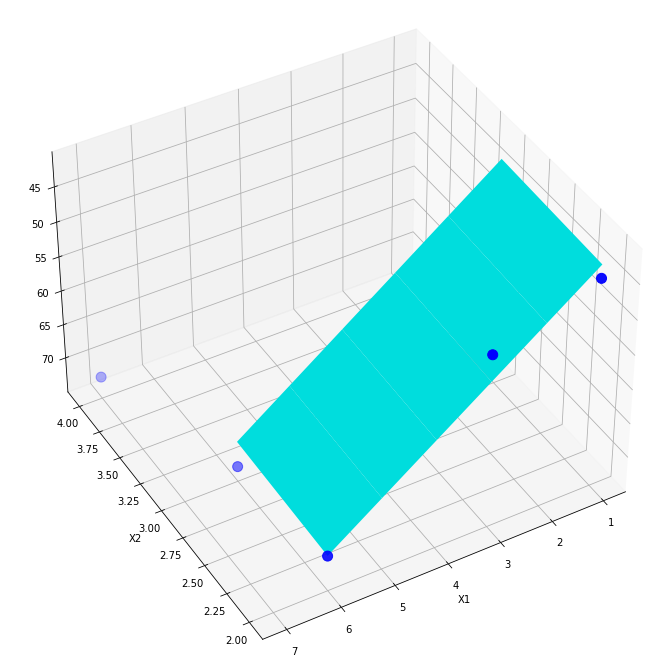

In [30]:
plt3d = plt.figure(figsize=(15,12)).gca(projection = '3d')
X1 = np.array(X[:,1]) #Array of X1 features
X2 = np.array(X[:,2]) #Array of X2 features
xx , yy = np.meshgrid(range(min(X1)[0],max(X1)[0]),
                      range(min(X2)[0],max(X2)[0])) #Creates a meshgrid in 3D
plt3d.scatter(np.array(X[:,1]),np.array(X[:,2]),
              np.array(Y[:,0]),color = 'blue',s=100) #Scattering of points (X1,X2,Y)
plt3d.plot_surface(xx,yy,
                   np.array(theta[0,0]+theta[1,0]*xx
                            +theta[2,0]*yy),color = 'cyan') #Plots the plane formed in 3D space 
plt3d.view_init(-140,120)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


### Multivariate Regression Algorithm implementation in separate functions to be called as per need.

We have now created functions to turn any dataset into aur matrix format so that we can apply our equations on it


In [31]:
def make_X_mat(dataset):
    return np.append(
        np.ones((dataset.shape[0],1)),
        dataset,
        axis=1)

Calculates weights and bias matrix for given input

In [32]:
def get_theta(X,Y):
    XT = X.T
    XTX_inv = np.dot(XT,X).I
    return np.dot(XTX_inv , np.dot(XT,Y))

Gives prediction for given feature matrix

In [33]:
def predict(X,theta):
    return(np.dot(X,theta))